In [137]:
import pandas as pd
import numpy as np
import os

from dtw import dtw
 
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist
from pandas.plotting import autocorrelation_plot
import ruptures as rpt


In [138]:
datapath=os.path.join('../data/unlabeled')

file='059-COMBINED-2022-11-9-10-20-34-1667996115-v1.4.3+lucina-buzz.csv'

df=pd.read_csv(os.path.join(datapath,file))

In [139]:
penalty= 23 # treshold

(3000, 8)
9 points detected using penalty= 23


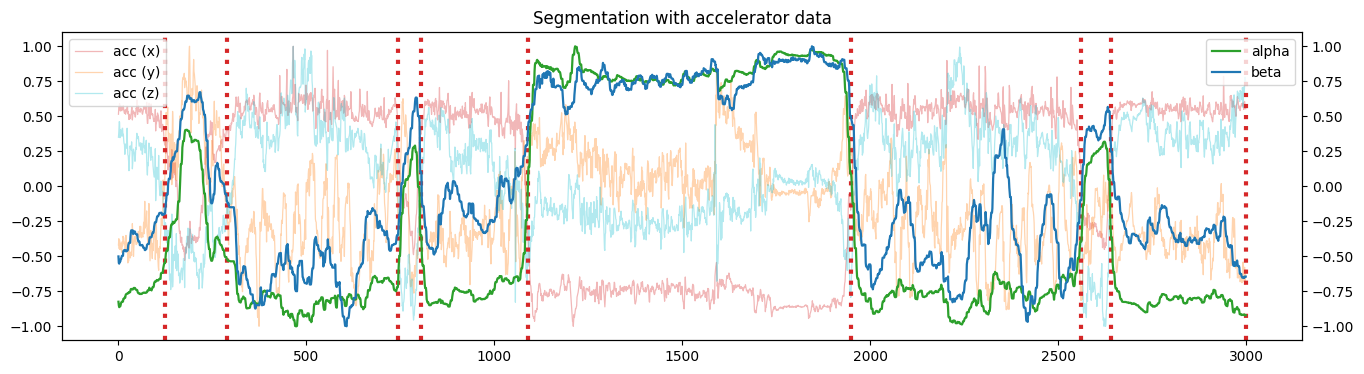

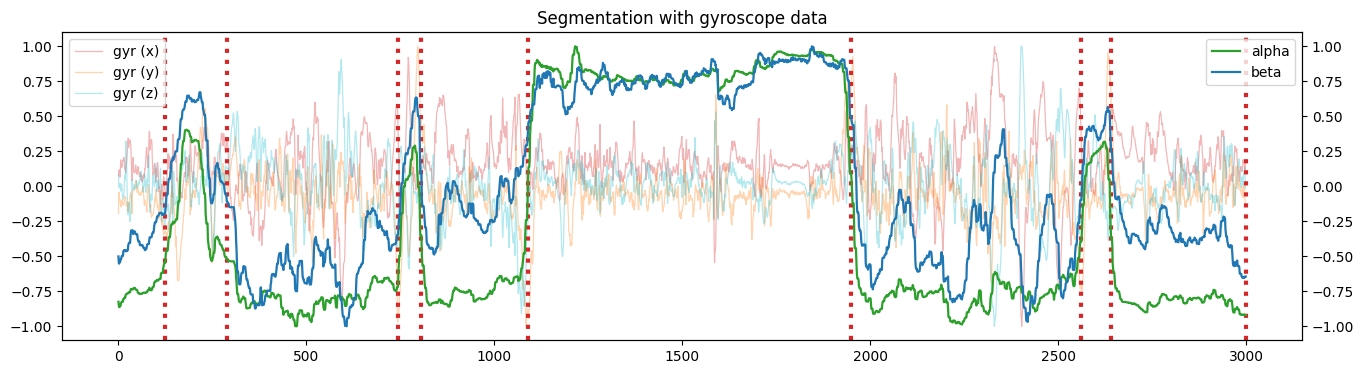

In [140]:
# Make an array with x,y,z acc and gyro and alpha_r and beta_r to use in ruptures

ts_start= 10500
ts_end  = 13500

acc_x_n_c=np.array(df['acc_x_n'][ts_start:ts_end])
acc_y_n_c=np.array(df['acc_y_n'][ts_start:ts_end])
acc_z_n_c=np.array(df['acc_z_n'][ts_start:ts_end])

gyr_x_n_c=np.array(df['gyr_x_n'][ts_start:ts_end])
gyr_y_n_c=np.array(df['gyr_y_n'][ts_start:ts_end])
gyr_z_n_c=np.array(df['gyr_z_n'][ts_start:ts_end])

alpha_r_c = np.array(df['alpha_r'][ts_start:ts_end])
beta_r_c  = np.array(df['beta_r'][ts_start:ts_end])
 

# Normalise
alpha_r = (alpha_r_c - alpha_r_c.min()) * (2/(alpha_r_c.max() - alpha_r_c.min())) - 1
beta_r = (beta_r_c - beta_r_c.min()) * (2/(beta_r_c.max() - beta_r_c.min())) - 1

acc_x_n = (acc_x_n_c - acc_x_n_c.min()) * (2/(acc_x_n_c.max() - acc_x_n_c.min())) - 1 
acc_y_n = (acc_y_n_c - acc_y_n_c.min()) * (2/(acc_y_n_c.max() - acc_y_n_c.min())) - 1
acc_z_n = (acc_z_n_c - acc_z_n_c.min()) * (2/(acc_z_n_c.max() - acc_z_n_c.min())) - 1

gyr_x_n = (gyr_x_n_c - gyr_x_n_c.min()) * (2/(gyr_x_n_c.max() - gyr_x_n_c.min())) - 1 
gyr_y_n = (gyr_y_n_c - gyr_y_n_c.min()) * (2/(gyr_y_n_c.max() - gyr_y_n_c.min())) - 1
gyr_z_n = (gyr_z_n_c - gyr_z_n_c.min()) * (2/(gyr_z_n_c.max() - gyr_z_n_c.min())) - 1

# make an array of the features
a=np.vstack([acc_x_n,acc_y_n,acc_z_n,gyr_x_n,gyr_y_n,gyr_z_n,alpha_r,beta_r]).T
print (np.shape(a))

# Use segmentation 
algo=rpt.Pelt(model='rbf').fit(a)
results=algo.predict(pen=penalty)


# Draw the accelerator plot
fig,ax=plt.subplots(figsize=(16, 4))
plt.title('Segmentation with accelerator data')
axb=ax.twinx()
ax.plot(acc_x_n,color='tab:red',linewidth=.9 , label ='acc (x)', alpha=0.33)
ax.plot(acc_y_n,color='tab:orange',linewidth=.9 , label ='acc (y)', alpha=0.33)
ax.plot(acc_z_n,color='tab:cyan',linewidth=.9 , label ='acc (z)' , alpha=0.33)


axb.plot(alpha_r,color='tab:green',linewidth=1.6 , label ='alpha')
axb.plot(beta_r,color='tab:blue',linewidth=1.6 , label ='beta')
ax.legend(loc='upper left', bbox_to_anchor=(0, 1))
axb.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Draw the change points
cnt=int(0)
for r in results:
    ax.axvline(x=r,color="tab:red",linewidth=3,linestyle=':')
    cnt+=1


# Draw the gyroscope plot
fig,ax=plt.subplots(figsize=(16, 4))
plt.title('Segmentation with gyroscope data')

axb=ax.twinx()
ax.plot(gyr_x_n,color='tab:red',linewidth=.9 , label ='gyr (x)' , alpha=0.33)
ax.plot(gyr_y_n,color='tab:orange',linewidth=.9 , label ='gyr (y)' , alpha=0.33)
ax.plot(gyr_z_n,color='tab:cyan',linewidth=.9 , label ='gyr (z)' , alpha=0.33)

axb.plot(alpha_r,color='tab:green',linewidth=1.6 , label ='alpha')
axb.plot(beta_r,color='tab:blue',linewidth=1.6 , label ='beta')
ax.legend(loc='upper left', bbox_to_anchor=(0, 1))
axb.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Draw the change points
cnt=int(0)
for r in results:
    ax.axvline(x=r,color="tab:red",linewidth=3,linestyle=':')
    cnt+=1


# Result
print (cnt,'points detected using penalty=',penalty)


In [141]:
# ideas for Feature engineering
# Variation (amplitude)
# slope (horizontal, up, down)
 

In [147]:
# Function to extract a frame

def get_frame(start,end):

    acc_x_n=np.array(df['acc_x_n'][start:end])
    acc_y_n=np.array(df['acc_y_n'][start:end])
    acc_z_n=np.array(df['acc_z_n'][start:end])
    gyr_x_n=np.array(df['gyr_x_n'][start:end])
    gyr_y_n=np.array(df['gyr_y_n'][start:end])
    gyr_z_n=np.array(df['gyr_z_n'][start:end])

    alpha_r=np.array(df['alpha_r'][start:end])
    beta_r = np.array(df['beta_r'][start:end])
     
    # Normalise
    alpha_r = (alpha_r - alpha_r_c.min()) * (2/(alpha_r_c.max() - alpha_r_c.min())) - 1
    beta_r = (beta_r - beta_r_c.min()) * (2/(beta_r_c.max() - beta_r_c.min())) - 1

    gyr_x_n = (gyr_x_n - gyr_x_n_c.min()) * (2/(gyr_x_n_c.max() - gyr_x_n_c.min())) 
    gyr_y_n = (gyr_y_n - gyr_y_n_c.min()) * (2/(gyr_y_n_c.max() - gyr_y_n_c.min())) 
    gyr_z_n = (gyr_z_n - gyr_z_n_c.min()) * (2/(gyr_z_n_c.max() - gyr_z_n_c.min())) 

    return acc_x_n,acc_y_n,acc_z_n,gyr_x_n,gyr_y_n,gyr_z_n,alpha_r,beta_r

# Function to plot a graph of a frame

def plot_frame(acc_x_n,acc_y_n,acc_z_n,gyr_x_n,gyr_y_n,gyr_z_n,alpha_r,beta_r,i):
    fig,ax=plt.subplots(figsize=(16, 4))

    plt.title(f'frame {i+1}')

    axb=ax.twinx()
    ax.plot(acc_x_n,color='tab:red',linewidth=.9 , label ='acc (x)', alpha=0.4)
    ax.plot(acc_y_n,color='tab:orange',linewidth=.9 , label ='acc (y)', alpha=0.4)
    ax.plot(acc_z_n,color='tab:cyan',linewidth=.9 , label ='acc (z)' , alpha=0.4)

    ax.plot(gyr_x_n,color='tab:red',linewidth=.9 , label ='gyr (x)', linestyle=':', alpha=0.66)
    ax.plot(gyr_y_n,color='tab:orange',linewidth=.9 , label ='gyr (y)', linestyle=':', alpha=0.66)
    ax.plot(gyr_z_n,color='tab:cyan',linewidth=.9 , label ='gyr (z)' , linestyle=':', alpha=0.66)

    axb.plot(alpha_r,color='tab:green',linewidth=1.6 , label ='alpha')
    axb.plot(beta_r,color='tab:blue',linewidth=1.6 , label ='beta')
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1))
    axb.legend(loc='upper right', bbox_to_anchor=(1, 1))
    
    plt.show()


In [145]:
# Make frames from the change points

offset=ts_start

change_points=[]
start_point=[]
end_point=[]

for r in results:
    change_points.append(r)

start_point.append(0 + offset)
for i in range(0,len(change_points)-1,1):
    #print (i)
    end_point.append( change_points[i] + offset + 10)
    start_point.append( change_points[i] + offset - 10)
end_point.append(change_points[len(change_points)-1] + offset )
print (f'{len(change_points)} frames detected')
print(change_points)
print (start_point)
print (end_point)

9 frames detected
[125, 290, 745, 805, 1090, 1950, 2560, 2640, 3000]
[10500, 10615, 10780, 11235, 11295, 11580, 12440, 13050, 13130]
[10635, 10800, 11255, 11315, 11600, 12460, 13070, 13150, 13500]


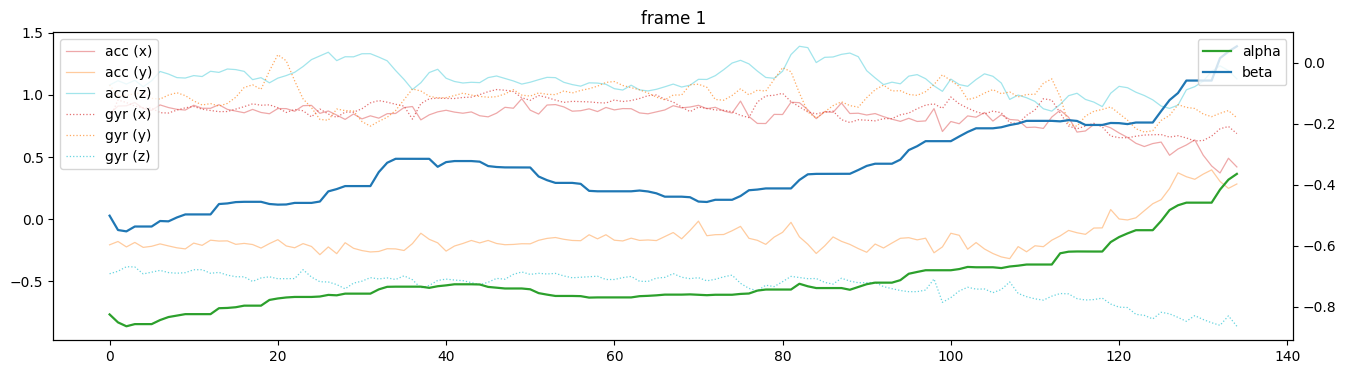

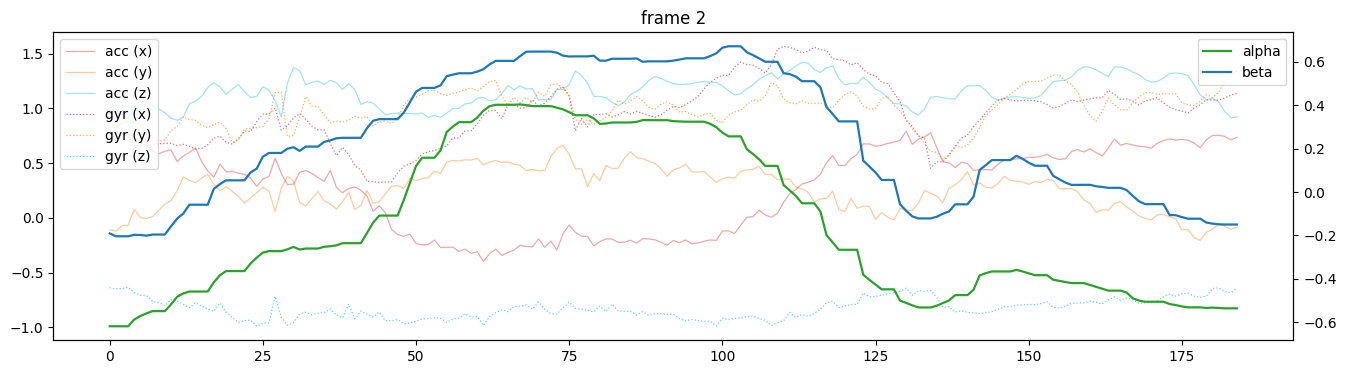

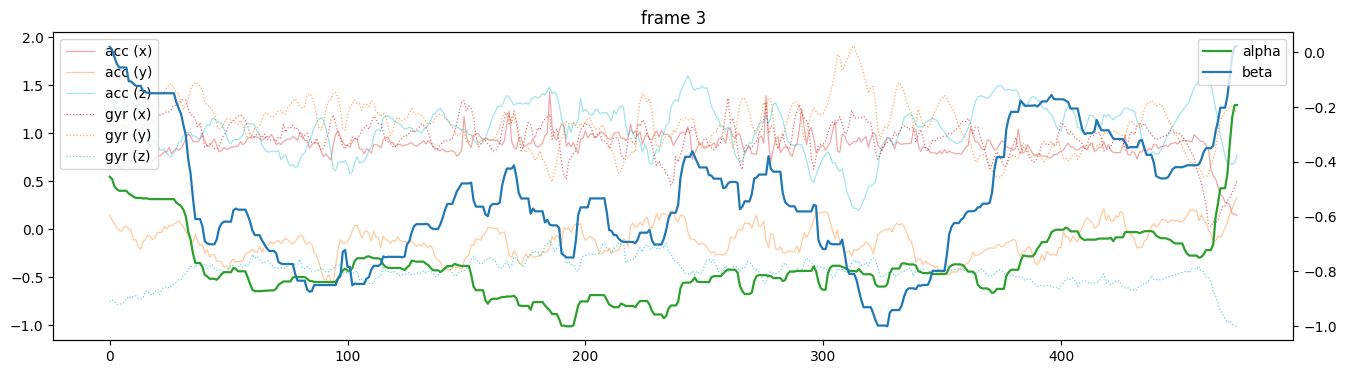

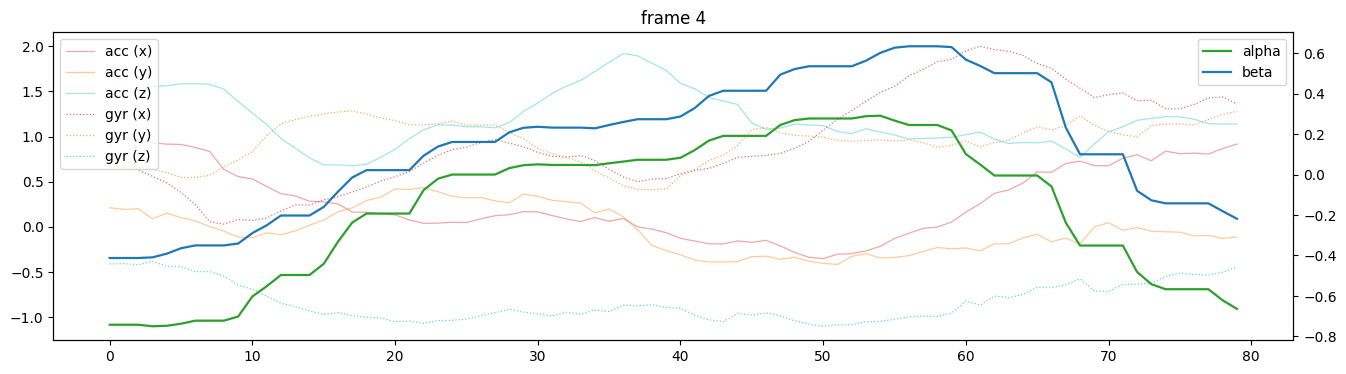

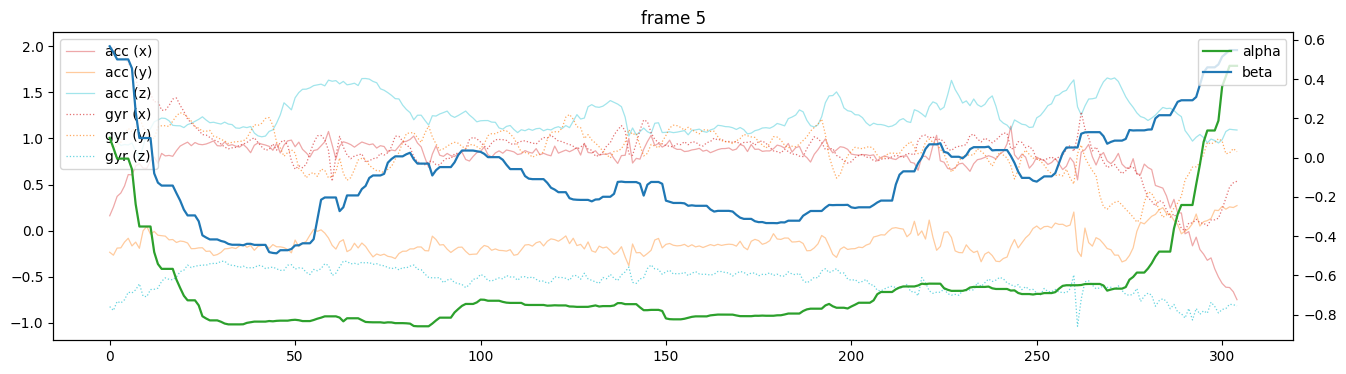

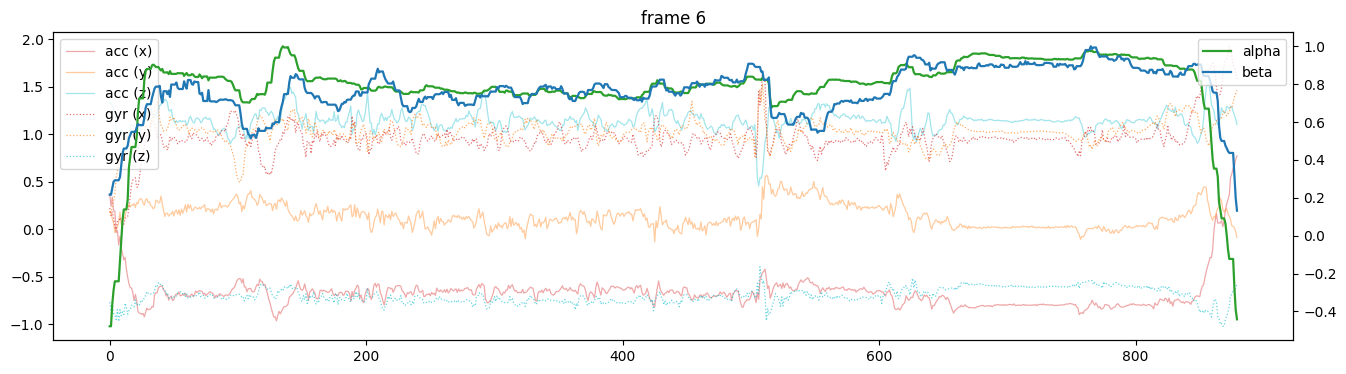

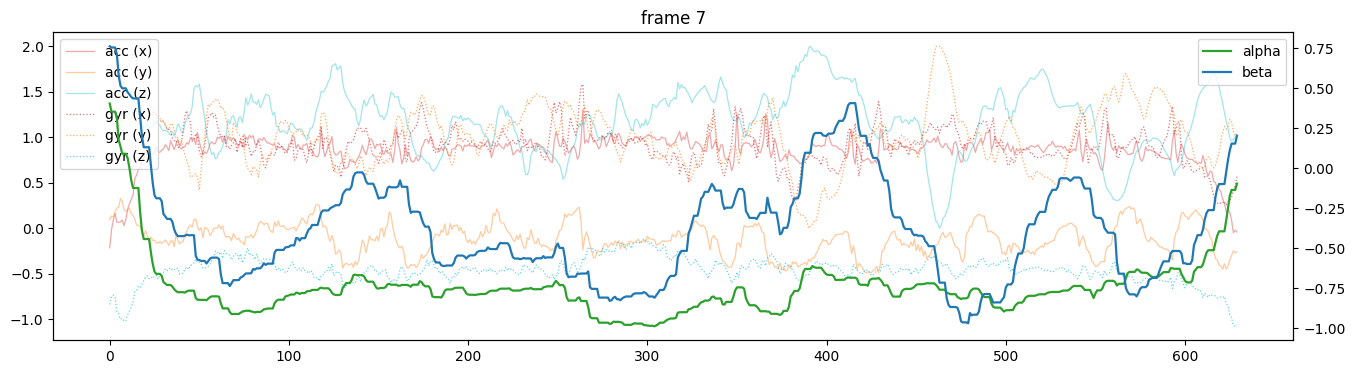

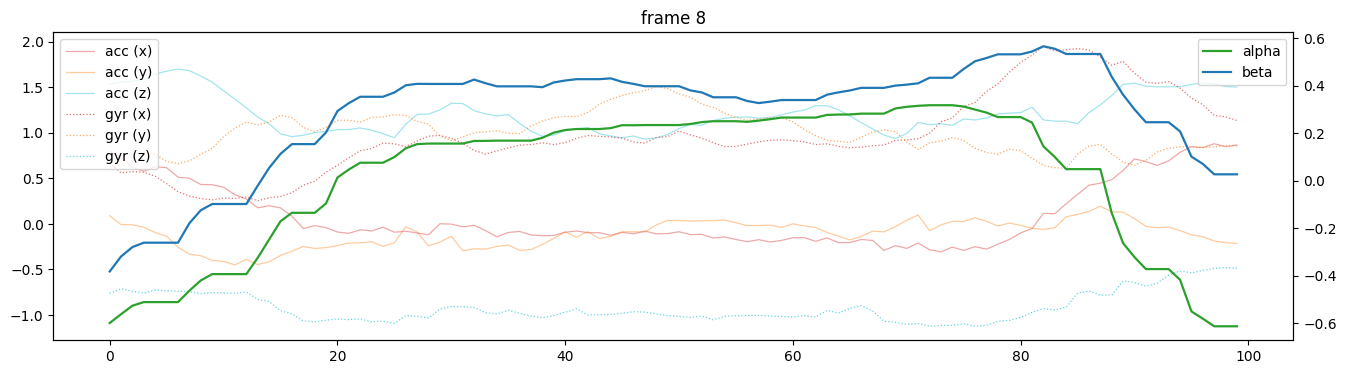

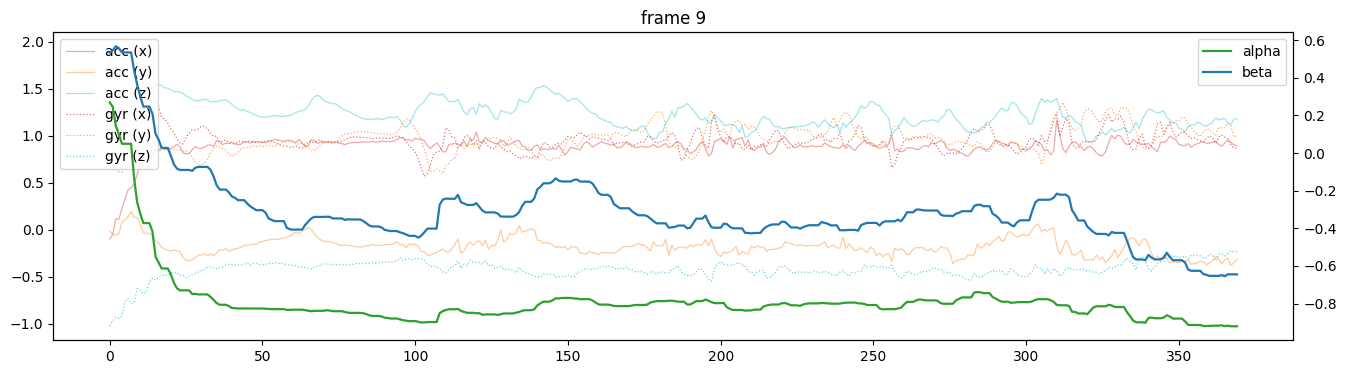

In [148]:
for i in range(len(change_points)):
    acc_x_n,acc_y_n,acc_z_n,gyr_x_n,gyr_y_n,gyr_z_n, alpha_r,beta_r=get_frame(start_point[i],end_point[i])
    
    plot_frame(acc_x_n,acc_y_n,gyr_x_n,gyr_y_n,gyr_z_n,acc_z_n,alpha_r,beta_r,i)